<a href="https://colab.research.google.com/github/mineozcan/UMBC-DATA609-FALL24-WANG/blob/main/Assignments/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 05

In [127]:
import pandas as pd
import plotly.express as px

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

df.shape

(4123, 9)

In [128]:
df.sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
1203,2010,Eswatini,4035.534481,46.61900,1099920.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD
3071,2016,Russian Federation,8704.894531,71.65122,144342397.0,RUS,Europe & Central Asia,Upper middle income,IBRD
3799,2022,Turkmenistan,8792.548504,NaN,6430770.0,TKM,Europe & Central Asia,Upper middle income,IBRD
740,2022,Chad,716.804381,NaN,17723315.0,TCD,Sub-Saharan Africa,Low income,IDA
2123,2018,Lesotho,1162.978854,53.73300,2198017.0,LSO,Sub-Saharan Africa,Lower middle income,IDA


In [129]:
df.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),161
"Life expectancy at birth, total (years)",346
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [130]:
df[["Year", "Country","GDP per capita (current US$)", "Life expectancy at birth, total (years)"]].sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)"
501,2011,Brazil,13200.556235,73.343000
1982,2010,"Korea, Rep.",23079.260126,80.117073
1856,2017,Jamaica,5273.149027,71.911000
4027,2022,Viet Nam,4163.514299,NaN
10,2014,Afghanistan,626.512930,62.545000


In [131]:
df_2022 = df[df["Year"] != 2022]
df_2022.shape

(3906, 9)

In [132]:
df_2022.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),140
"Life expectancy at birth, total (years)",129
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [133]:
df_2022 = df_2022.dropna()
df_2022.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),0
"Life expectancy at birth, total (years)",0
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [134]:
df_2022.shape

(3641, 9)

## Homework Question 1:

to check if this dataset has duplicate rows. If it has, only keep one from the duplicated rows and drop the rest.

In [135]:
df.duplicated().sum()

0

In [136]:
df[df.duplicated()]

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type


In [137]:
df_cleaned = df.drop_duplicates()

print(f"Cleaned shape: {df_cleaned.shape}")
print(df_cleaned.sample(5))


Cleaned shape: (4123, 9)
      Year                         Country  GDP per capita (current US$)  \
3401  2004                           Spain                  24907.000851   
206   2020                       Australia                  51868.247557   
2353  2020                           Malta                  29597.636163   
3507  2015  St. Vincent and the Grenadines                   7386.746638   
3995  2009                   Venezuela, RB                  11641.799147   

      Life expectancy at birth, total (years)  Population, total Country Code  \
3401                                79.870732         42921895.0          ESP   
206                                 83.200000         25649248.0          AUS   
2353                                82.348780           515332.0          MLT   
3507                                74.407000           106482.0          VCT   
3995                                72.579000         28327892.0          VEN   

                          Regio

## HW Question 2

Find out if there is a relationship between wealth and health

Pick any year worth of data and use plotly express to generate a scatter plot with GDP as x and life expectancy as y.

In [138]:
year_of_interest = 2019

df_2019 = df[df["Year"] == year_of_interest]
print(df_2019.shape)
df_2019.sample(5)


(217, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
1212,2019,Eswatini,3818.540484,60.549,1169613.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD
2599,2019,Namibia,5126.176143,63.075,2446644.0,NAM,Sub-Saharan Africa,Upper middle income,IBRD
1858,2019,Jamaica,5626.170473,71.767,2813773.0,JAM,Latin America & Caribbean,Upper middle income,IBRD
3283,2019,Sint Maarten (Dutch part),33836.773350,75.437,41608.0,SXM,Latin America & Caribbean,High income,Not classified
186,2019,Aruba,31902.809818,76.248,106442.0,ABW,Latin America & Caribbean,High income,Not classified


In [139]:
df_2019.isna().sum()

,0
Year,0
Country,0
GDP per capita (current US$),6
"Life expectancy at birth, total (years)",8
"Population, total",0
Country Code,0
Region,0
Income Group,0
Lending Type,0


In [140]:
df_2019 = df_2019.dropna(subset=["GDP per capita (current US$)", "Life expectancy at birth, total (years)"])
print(df_2019.shape)
df_2019.sample(5)

(203, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
2333,2019,Mali,840.175746,59.664000,20567424.0,MLI,Sub-Saharan Africa,Low income,IDA
3340,2019,Solomon Islands,2398.773050,70.382000,674993.0,SLB,East Asia & Pacific,Lower middle income,IDA
1307,2019,France,40494.898294,82.826829,67388001.0,FRA,Europe & Central Asia,High income,Not classified
110,2019,Angola,2191.347764,62.448000,32353588.0,AGO,Sub-Saharan Africa,Lower middle income,IBRD
471,2019,Bosnia and Herzegovina,6094.724823,77.241000,3360711.0,BIH,Europe & Central Asia,Upper middle income,IBRD


In [141]:

fig = px.scatter(
    df_2019,
    x="GDP per capita (current US$)",
    y="Life expectancy at birth, total (years)",
    color="Country",
    size="Population, total",
    title=f"Relationship between GDP per Capita and Life Expectancy in {year_of_interest}",
    labels={
        "GDP per capita (current US$)": "GDP per Capita (Current US$)",
        "Life expectancy at birth, total (years)": "Life Expectancy (Years)"
    }
)

fig.show()

## Compare China, US, India, Russia

In [142]:
df_4_countries = df_2019[df_2019["Country Code"].isin(["USA", "CHN", "IND", "RUS"])]
print(df_4_countries.shape)
df_4_countries

(4, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
794,2019,China,10143.860221,77.968000,1.407745e+09,CHN,East Asia & Pacific,Upper middle income,IBRD
1706,2019,India,2050.163800,70.910000,1.383112e+09,IND,South Asia,Lower middle income,IBRD
3074,2019,Russian Federation,11536.258789,73.083902,1.444063e+08,RUS,Europe & Central Asia,Upper middle income,IBRD
3929,2019,United States,65120.394663,78.787805,3.283300e+08,USA,North America,High income,Not classified


In [143]:

fig = px.scatter(
    df_4_countries,
    x="GDP per capita (current US$)",
    y="Life expectancy at birth, total (years)",
    color="Country",
    text="Country",
    size="Population, total",
    title=f"Relationship between GDP per Capita and Life Expectancy in {year_of_interest}",
    labels={
        "GDP per capita (current US$)": "GDP per Capita (Current US$)",
        "Life expectancy at birth, total (years)": "Life Expectancy (Years)"
    },
    height=600,
    width=1000
)

# Update text position
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

fig.show()

In [144]:
df_quad = df[df["Country Code"].isin(["USA", "CHN", "IND", "RUS"])]
print(df_quad.shape)
df_quad.sample(5)

(76, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
786,2011,China,5614.386022,75.903000,1.345035e+09,CHN,East Asia & Pacific,Upper middle income,IBRD
3066,2011,Russian Federation,14311.064453,69.683902,1.429609e+08,RUS,Europe & Central Asia,Upper middle income,IBRD
1707,2020,India,1913.219733,70.150000,1.396387e+09,IND,South Asia,Lower middle income,IBRD
3919,2009,United States,47194.943355,78.390244,3.067715e+08,USA,North America,High income,Not classified
1701,2014,India,1559.863779,69.074000,1.307247e+09,IND,South Asia,Lower middle income,IBRD


In [145]:
fig = px.line(
    df_quad,
    x="Year",
    color="Country",
    y="GDP per capita (current US$)"
)

fig.show()

In [146]:
df_group = df.groupby(["Year", "Region"])["Population, total"].sum().reset_index()
df_group

,Year,Region,"Population, total"
0,2004,East Asia & Pacific,2.094011e+09
1,2004,Europe & Central Asia,8.702708e+08
2,2004,Latin America & Caribbean,5.498976e+08
3,2004,Middle East & North Africa,3.470449e+08
4,2004,North America,3.248097e+08
5,2004,South Asia,1.515703e+09
6,2004,Sub-Saharan Africa,7.465468e+08
7,2005,East Asia & Pacific,2.109795e+09
8,2005,Europe & Central Asia,8.729137e+08
9,2005,Latin America & Caribbean,5.567395e+08


Home work #5
Pick a few countries of your interest (for example, G7, BRICS, Nordic countries).
- 1 Create a line chart showing the trend of Life Expectancy over time for comparing those countries.
- 2 Pick a year from the data of the above few countries and create a scatter plot to compare their GDP per capita and life expectancy. The size of the dots represent the population. This type of scatter plot is called bubble chart.
- 3 Bonus - compute the average GDP per capita, the average life expectancy, and the total population for each year of all the seven regions (aggregation) and repeat 1 and 2 using the aggregated data for all regions

homework 5

1st question

In [147]:
import pandas as pd
import plotly.express as px

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

df.shape

(4123, 9)

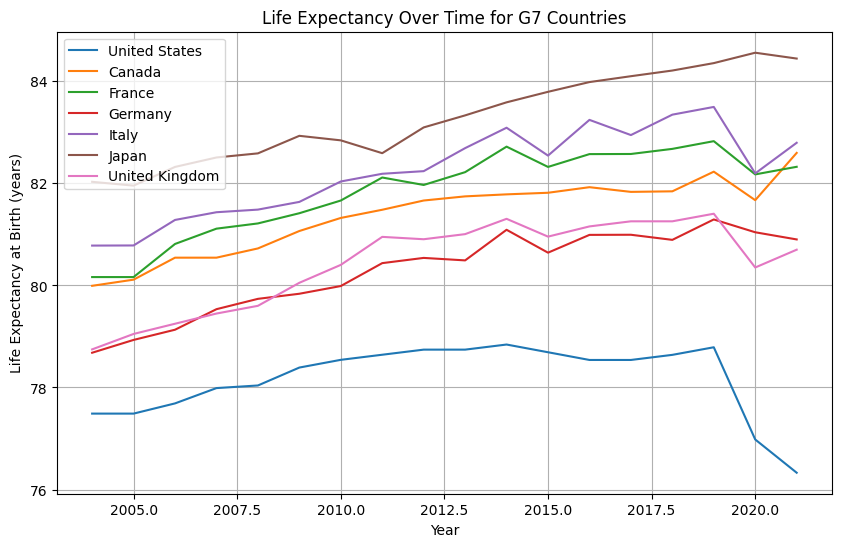

In [148]:
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']
df_g7 = df[df['Country'].isin(g7_countries)]

# Plotting
plt.figure(figsize=(10, 6))
for country in g7_countries:
  country_data = df_g7[df_g7['Country'] == country]
  plt.plot(country_data['Year'], country_data['Life expectancy at birth, total (years)'], label=country)

plt.title('Life Expectancy Over Time for G7 Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend()
plt.grid(True)
plt.show()

Homework 5
2nd question

In [149]:
year = 2020
df_g7= df_g7[df['Year'] == year]
fig = px.scatter(
    df_g7,
    x="GDP per capita (current US$)",
    y="Life expectancy at birth, total (years)",
    color="Country",
    text="Country",
    size="Population, total",
    title=f"Relationship between GDP per Capita and Life Expectancy in {year}",
    labels={
        "GDP per capita (current US$)": "GDP per Capita (Current US$)",
        "Life expectancy at birth, total (years)": "Life Expectancy (Years)"
    },
    height=600,
    width=1000
)

# Update text position
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

fig.show()

<ipython-input-149-b2f61e91faf4>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



homework 5

bonus question 3

 compute the average GDP per capita, the average life expectancy, and the total population for each year of all the seven regions (aggregation) and repeat 1 and 2 using the aggregated data for all regions

df_group = df.groupby(["Year", "Region"])["Population, total"].sum().reset_index()
df_group

Aggregated Data by Region:
     Year                      Region  GDP per capita (current US$)  \
0    2004         East Asia & Pacific                   9855.982289   
1    2004       Europe & Central Asia                  24463.163431   
2    2004  Latin America & Caribbean                    7321.817541   
3    2004  Middle East & North Africa                  10118.184045   
4    2004               North America                  48075.877382   
5    2004                  South Asia                   1067.545760   
6    2004         Sub-Saharan Africa                    1432.799902   
7    2005         East Asia & Pacific                  10587.143349   
8    2005       Europe & Central Asia                  25938.836106   
9    2005  Latin America & Caribbean                    8166.280338   
10   2005  Middle East & North Africa                  11970.270088   
11   2005               North America                  52129.316280   
12   2005                  South Asia             

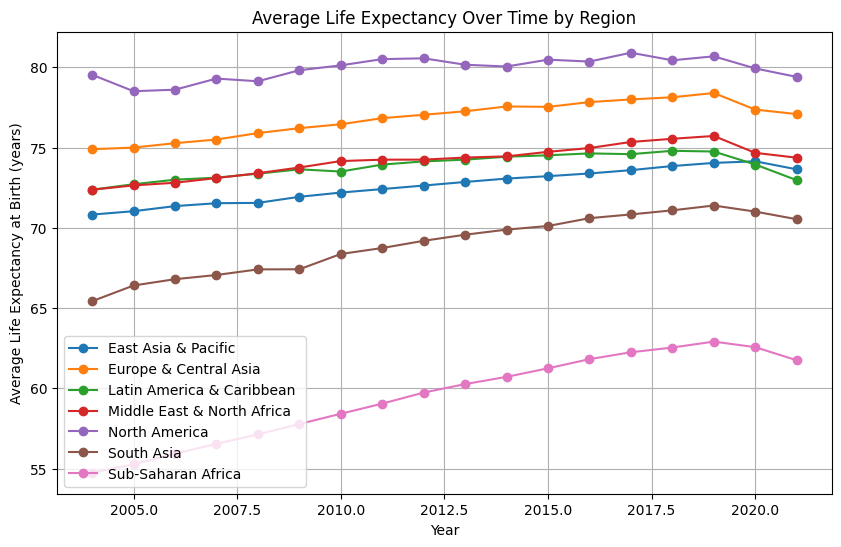

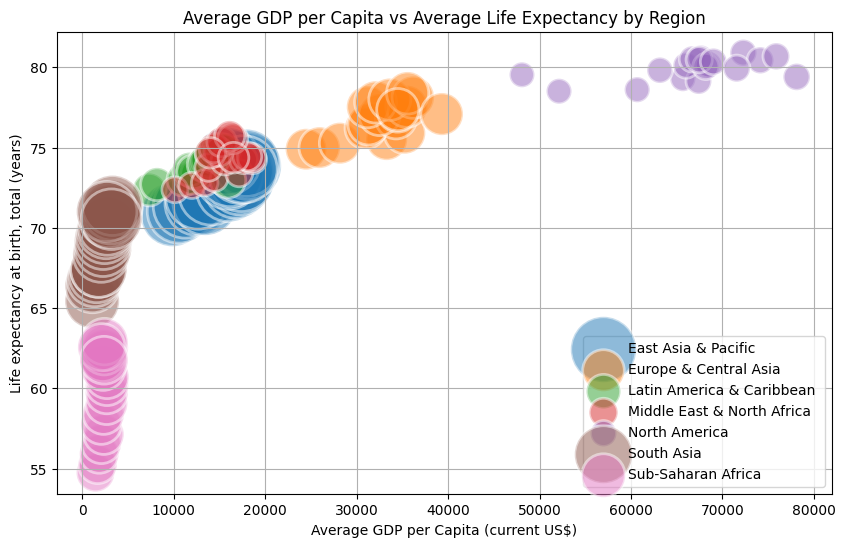

In [156]:
# Aggregate data by year and region
aggregated_data = df.groupby(['Year', 'Region']).agg({
  'GDP per capita (current US$)': 'mean',
  'Life expectancy at birth, total (years)': 'mean',
  'Population, total': 'sum'
}).reset_index()

print("Aggregated Data by Region:")
print(aggregated_data)

# Plotting the line chart for average life expectancy over time for each region
plt.figure(figsize=(10, 6))
for region in aggregated_data['Region'].unique():
  region_data = aggregated_data[aggregated_data['Region'] == region]
  plt.plot(region_data['Year'], region_data['Life expectancy at birth, total (years)'], marker='o', label=region)

plt.title('Average Life Expectancy Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy at Birth (years)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the bubble chart for GDP per capita vs life expectancy for each region
plt.figure(figsize=(10, 6))
for region in aggregated_data['Region'].unique():
  region_data = aggregated_data[aggregated_data['Region'] == region]
  plt.scatter(
      region_data['GDP per capita (current US$)'],
      region_data['Life expectancy at birth, total (years)'],
      s=region_data['Population, total'] / 1e6,  # Scale population for bubble size
      alpha=0.5,
      label=region,
      edgecolors='w',
      linewidth=2
  )

plt.title('Average GDP per Capita vs Average Life Expectancy by Region')
plt.xlabel('Average GDP per Capita (current US$)')
plt.ylabel('Life expectancy at birth, total (years)')
plt.legend()
plt.grid(True)
plt.show()

## Homework Question 3

Select a year of data. calculate total population of each region and make a pie chart to display the distribution of total population of all regions.

In [150]:
df_filtered = df_filtered.dropna(subset=["Population, total", "Region"])

population_by_region = df_filtered.groupby("Region")["Population, total"].sum().reset_index()


fig = px.pie(
    population_by_region,
    values='Population, total',
    names='Region',
    title=f"Total Population Distribution by Region in {year_of_interest}",
    labels={'Population, total': 'Total Population'}
)

NameError: name 'df_filtered' is not defined

In [ ]:
fig.show()

## Exercise

Calculate average GDP per capita for  each region and make a bar chart.

In [ ]:

df_cleaned = df[['Region', 'GDP per capita (current US$)']].dropna()

average_gdp_by_region = df_cleaned.groupby('Region').agg({'GDP per capita (current US$)': 'mean'}).reset_index()
fig = px.bar(
    data_frame=average_gdp_by_region,
    x='Region',
    y='GDP per capita (current US$)',
    title='Average GDP per Capita by Region',
    labels={
        'GDP per capita (current US$)': 'Average GDP per Capita (Current US$)',
        'Region': 'Region'
    },
    text='GDP per capita (current US$)'
)


fig.show()


In [151]:
df_2020 = df3[df3["Year"] == 2020]
df_2020.shape

NameError: name 'df3' is not defined

In [ ]:
df_2020.sample(5)

In [ ]:
df_group = df.groupby("Region")["GDP per capita (current US$)"].mean()
df_group

In [ ]:
df_group = df_group.reset_index()
df_group

In [ ]:
fig = px.bar(df_group, x="Region", y="GDP per capita (current US$)", color="Region")

fig.show()

## Home work question 4

1. remove the color legend.
2. Order the above bar chart based on the values of the average GDP per capita.

In [ ]:
df_group = df_group.sort_values(by="GDP per capita (current US$)", ascending=False)

fig = px.bar(df_group,
             x="Region",
             y="GDP per capita (current US$)",
             color="Region")

fig.update_layout(showlegend=False)

